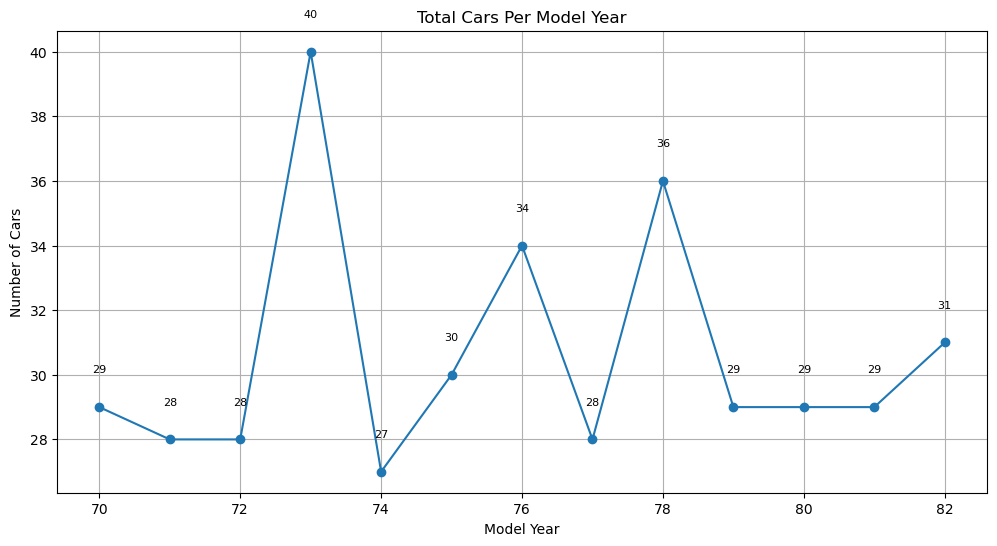

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Total Cars per Model Year
data = pd.read_csv("Automobile.csv")

# Group by year model and count the number of cars
cars_per_year = data['model_year'].value_counts().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(cars_per_year.index, cars_per_year.values, marker='o')
plt.title('Total Cars Per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.grid(True)

# Add Label
for x, y in zip(cars_per_year.index, cars_per_year.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=8)
    
plt.show()